In [1]:
c

# 1.1

Import the data, draw their histogram

(array([8358.,  931.,  317.,  180.,   83.,   47.,   31.,   19.,   20.,
          14.]),
 array([ 100.,  256.,  412.,  568.,  724.,  880., 1036., 1192., 1348.,
        1504., 1660.]),
 <BarContainer object of 10 artists>)

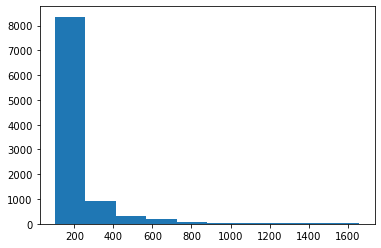

In [2]:
obs = list(dict(nx.generators.barabasi_albert_graph(10000, 100).degree).values())
plt.hist(obs)

# 1.2

Correct the scale of the plot’s axes to double logarithmic

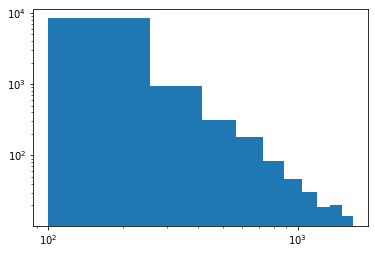

In [3]:
plt.hist(obs)
plt.yscale('log')
plt.xscale('log')

# 1.3

Apply logarithmic binning as well

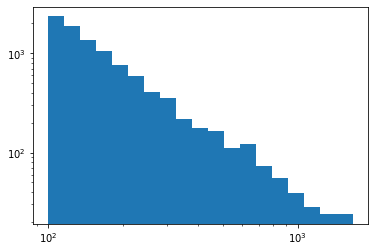

In [4]:
loglog_hist =plt.hist(obs, bins=np.exp(np.linspace(np.log(min(obs)), np.log(max(obs)), 20)))
plt.yscale('log')
plt.xscale('log')

# 1.4

Compute and draw the survival function

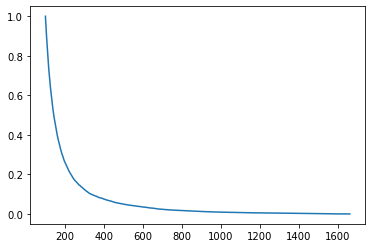

In [5]:
def survival(x: float, obs=obs) -> float:
    # cumulative distribution function
    cdf = len(list(filter(lambda v: v<x, obs)))/len(obs) # nr of observations less than x/nr of observations
    return 1-cdf
x_to_plot=np.unique(obs)
y_to_plot=[survival(x) for x in x_to_plot]
plt.plot(x_to_plot, y_to_plot)

## 1.6

In [6]:
from sklearn.linear_model import LinearRegression
log_y = loglog_hist[0].reshape(-1,1)
log_x = np.array([(a+b)/2 for a,b in zip(loglog_hist[1][:-1], loglog_hist[1][1:], )]).reshape(-1,1) # middles of the intervals
model = LinearRegression(fit_intercept=True).fit(log_x, log_y)
model.coef_, model.intercept_

(array([[-1.01865426]]), array([1082.77193306]))

$$
\alpha \approx -1\\
\beta = 1089\\
log(y) = \alpha log(x) +\beta\\
y = e^\beta x^\alpha \\
\therefore y \sim C\frac{1}{x}$$

# 1.7

$$ 
L(x; \alpha ) = \prod_{i=1}^n \big [ \frac{\alpha-1}{x_{min}}(\frac{x_i}{x_{min}})^{-a} \big ]\\
\log L(x; \alpha ) = n\log(\alpha-1) - (\alpha+1)\log(x_{min}) -\alpha\sum_{i=1}^n log(x_i)
$$


$$
\frac{d}{d\alpha} \log L(x; \alpha ) = \frac{n}{\alpha-1} - log(x_{min}) - \sum_{i=1}^n log(x_i) \\
\frac{d}{d\alpha} \log L(x; \alpha ) = 0 \Leftrightarrow \alpha = 1 + \frac{n} { log(x_{min}) + \sum_{i=1}^n log(x_i)}
$$

In [7]:
def mle(obs):
    x_min = min(obs) # probably a biased estimator of x_min
    return 1+ len(obs)/(np.log(x_min) + sum(np.log(obs)))
mle(obs)

1.1953677715433466

# 4.1
Collect obtained scripts for power distribution analysis in onefile. We will use them again and again. [20%]

# 4.3
Determine the dependence of the average degree of the nearestneighbor on the degree of the vertex for selected real or artificalnetworks. [20%]

In [8]:
def avg_degree(G: nx.Graph, k: int) -> float:
    dg =  dict(G.degree)
    k_nodes = [n for n, v in dg.items() if v==k] 
    averages = list(sum(dg[i] for i in G.neighbors(node))/k
            for node in k_nodes) ## list of Average degree of the nearest node for each node of degree k 
    return np.mean(averages)

(0.0, 279.9072538860104)

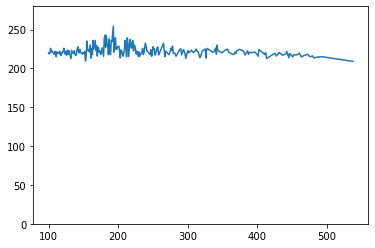

In [9]:
G = nx.generators.barabasi_albert_graph(1000, 100)
X = np.unique(list(dict(G.degree).values()))
Y = list(map(lambda x: avg_degree(G, x), X))
plt.plot(X, Y)
plt.ylim(0, max(Y)*1.1)

# 4.4
Check how random edge switching affects the result of theprevious task. [20%]


(0.0, 264.0711764705883)

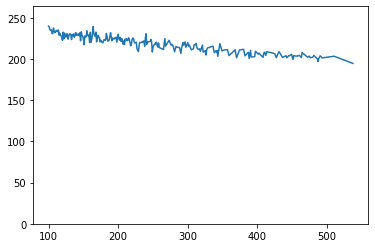

In [10]:
G = nx.algorithms.swap.double_edge_swap(G, nswap=len(G.edges)*2, max_tries=len(G.edges)*5)
X = np.unique(list(dict(G.degree).values()))
Y = list(map(lambda x: avg_degree(G, x), X))
plt.plot(X, Y)
plt.ylim(0, max(Y)*1.1)

## 5

In [11]:
def summary(G : nx.graph, name='', directed=False) -> dict:
    degrees = list(dict(G.degree).values())
    return {
        'name': name,
        'directed': directed,
        'N' : len(G.nodes),
        'E' : len(G.edges),
        '<k>': np.mean(degrees),
        'a': mle(degrees),
        'l': nx.average_shortest_path_length(G),
        'r': nx.degree_pearson_correlation_coefficient(G)
    }
ba = nx.generators.barabasi_albert_graph(1000, 10)
graphs = [{'G': ba, 'name' : 'BA'},
          {'G': nx.algorithms.swap.double_edge_swap(ba, nswap=len(ba.edges)*2, max_tries=len(ba.edges)*5), 
           'name' : 'BA edge switch'},
          {'G': nx.generators.directed.scale_free_graph(1000), 'name': 'scale free directed', 'directed' : True},
          {'G': nx.generators.erdos_renyi_graph(1000, 0.4), 'name': "ER"},
          {'G': nx.readwrite.edgelist.read_edgelist('fb-pages-politician.edges', delimiter=','), 'name': 'real-world'}]
pd.DataFrame([summary(**kwargs) for kwargs in graphs])

,name,directed,N,E,<k>,a,l,r
0,BA,False,1000,9900,19.800000,1.356860,2.541710,-0.057455
1,BA edge switch,False,1000,9900,19.800000,1.356860,2.541710,-0.057455
2,scale free directed,True,1000,2187,4.374000,2.756592,0.164074,0.042834
3,ER,False,1000,199935,399.870000,1.166770,1.599730,-0.003305
4,real-world,False,5908,41729,14.126269,1.503929,4.664107,0.018244
